In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Sets the threshold for what messages will be logged.
tf.logging.set_verbosity(tf.logging.INFO)

# 1. Data Preparation

## 1.1 Import Data

Import handwritten digits from keras dataset.

In [2]:
((train_data, train_labels),(eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

## 1.2 Data Preprocessing

### 1.2.1. Normalization

Scale these values to a range of 0 to 1 before feeding to the neural network model. 
For this, we divide the values by 255.

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32) 

# 2. Data Exploration

## 2.1 Training Dataset

train_data: 60000 handwritten digits, each image is represented as 28 x 28 pixels

train_labels: corresponding label of those 60000 handwritten digits, an integer between 0 ~ 9 (10 classes)

In [4]:
train_data.shape

(60000, 28, 28)

First image in training dataset: handwritten digits "5"

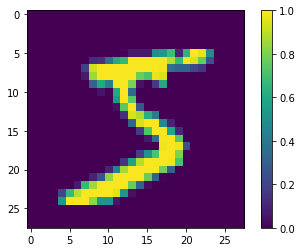

In [5]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 1.2 Testing Dataset

eval_data: 10000 handwritten digits, each image is represented as 28 x 28 pixels

eval_labels: corresponding label of those 10000 handwritten digits, an integer between 0 ~ 9 (10 classes)

In [6]:
eval_data.shape

(10000, 28, 28)

First image in testing dataset: handwritten digits "5"

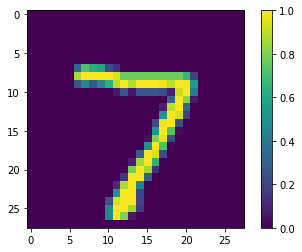

In [7]:
plt.figure()
plt.imshow(eval_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 2. Multilayer Perceptrons (MLP) Neural Network  

## 2.1. Structure of MLP Neural Network  

MLP is the most popular type of neural network. The structure of MLP neural network contains the following elements:

### 2.1.1 Input layer: 

    Features [X1,X2,..,Xn]
    
    
### 2.1.2. Hidden layer(s) (one or more): 

    Neurons take in a set of weighted inputs and produce an output through an activation function.
    Common examples of these functions are:
    
    Sigmoid Function: return value monotonically increasing most often from 0 to 1
    tanh Function: return value monotonically increasing most often from -1 to 1
    ReLU Function (If the initial output is negative, then output 0. If not, do nothing to the initial output)

### 2.1.3. Output layer

    Classification result that always produce by softmax function.
    
    Softmax function: An activation function that turns numbers aka logits into probabilities that sum to one.
    Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.

## 2.2. Build MLP Neural Network  (3 hidden layers)

### 2.2.1 Write Model Template

Input layer: 28 x 28 pixels images

3 Hidden layers: In each hidden layer, 100 neurons with relu activation function

Output layer: probability of those image belong to 0 ~ 9 (10 classes)

In [8]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0905 15:37:35.165101  5200 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 2.2.2. Compile Model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function. 'adam" uses the squared gradients to scale the learning rate.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [9]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
hist_1 = model_1.fit(train_data, train_labels,
                     epochs=10, 
                     validation_data=(eval_data, eval_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2421 - acc: 0.9266 - val_loss: 0.1332 - val_acc: 0.9583
Epoch 2/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1032 - acc: 0.9679 - val_loss: 0.0927 - val_acc: 0.9717
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0761 - acc: 0.9763 - val_loss: 0.0792 - val_acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0603 - acc: 0.9804 - val_loss: 0.0828 - val_acc: 0.9736
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0501 - acc: 0.9840 - val_loss: 0.0837 - val_acc: 0.9748
Epoch 6/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0403 - acc: 0.9868 - val_loss: 0.0990 - val_acc: 0.9714
Epoch 7/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0352 - acc: 0.9885 -

### Visualize the Model Loss Function (Model 1)

This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing.

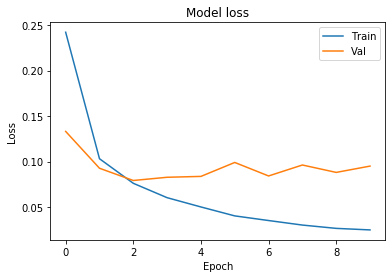

In [11]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### 2.2.3. Reduce Over-fitting Problem

Method 1: L2 Regularization

    Add the penalty to the loss function. The penalty is the squared value of the parameters, so the larger the parameters, the higher the loss will be.

Method 2: Dropout
    
    Randomly cause some of the neurons to be excluded from the neural network at each step with a fixed probability, it is forced to not overly rely on key neurons.

In [12]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
hist_2 = model_2.fit(train_data, train_labels,
                     epochs=10, 
                     validation_data=(eval_data, eval_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 154us/sample - loss: 1.0778 - acc: 0.8536 - val_loss: 0.6113 - val_acc: 0.9286
Epoch 2/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.6721 - acc: 0.9005 - val_loss: 0.5609 - val_acc: 0.9280
Epoch 3/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.6230 - acc: 0.9068 - val_loss: 0.5298 - val_acc: 0.9292
Epoch 4/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.5909 - acc: 0.9136 - val_loss: 0.5036 - val_acc: 0.9349
Epoch 5/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.5748 - acc: 0.9158 - val_loss: 0.4911 - val_acc: 0.9365
Epoch 6/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.5644 - acc: 0.9160 - val_loss: 0.4893 - val_acc: 0.9370
Epoch 7/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.5579 - acc: 0.9162 -

### Visualize the Model Loss Function (Model 2)

The validation loss much more closely matches our training loss.

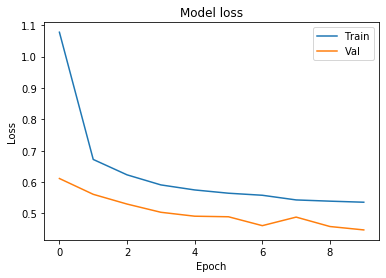

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# 3. Classification Result of Testing Data
## 3.1 Predicted Class 

In [15]:
Pre_eval = hist_2.model.predict_classes(eval_data)
Pre_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## 3.2 Confusion Matrix

In [16]:
CM = pd.crosstab(eval_labels, hist_2.model.predict_classes(eval_data),rownames=['Actual'], colnames=['Predicted'])
CM

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,970,0,1,0,0,3,3,1,2,0
1,0,1110,2,1,1,0,7,1,13,0
2,16,3,957,5,9,0,8,24,10,0
3,4,2,31,890,0,53,0,11,16,3
4,1,1,1,0,931,0,10,4,1,33
5,13,0,0,1,3,851,13,2,6,3
6,10,3,0,0,12,8,923,0,2,0
7,1,14,13,1,7,0,0,984,0,8
8,11,2,3,3,5,13,13,9,903,12


# 4. Save & Load Model
## 4.1 Save Model

In [17]:
model_2.save('my_model_2.h5')

## 4.2 Load Model 

In [18]:
reload_model = keras.models.load_model('my_model_2.h5')
reload_model.summary()

W0905 15:41:42.914183  5200 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0905 15:41:42.915179  5200 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              